In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1uqBcb-4BGe2x7N3HRkP43elRPJVv8hIv'}) # replace the id with id of file you want to access
downloaded.GetContentFile('ICC_cricket.csv') 

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data= pd.read_csv('ICC_cricket.csv')
print(data.shape)
data.head()


(50, 14)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,RG Sharma (INDIA),9,9,1,648,140,81.00,659,98.33,5,1,0,67,14
1,DA Warner (AUS),10,10,1,647,166,71.88,724,89.36,3,3,0,66,8
2,Shakib Al Hasan (BDESH),8,8,1,606,124*,86.57,631,96.03,2,5,0,60,2
3,KS Williamson (NZ),10,9,2,578,148,82.57,771,74.96,2,2,0,50,3
4,JE Root (ENG),11,11,2,556,107,61.77,621,89.53,2,3,0,48,2


In [0]:
X = data['Mat'].values
Y = data['Runs'].values

In [10]:
mean_x =np.mean(X)
mean_y =np.mean(Y)

m = len(X)

numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] -mean_y)
  denom += (X[i] - mean_x) **2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1,b0)


37.44775596072932 -4.684431977559655


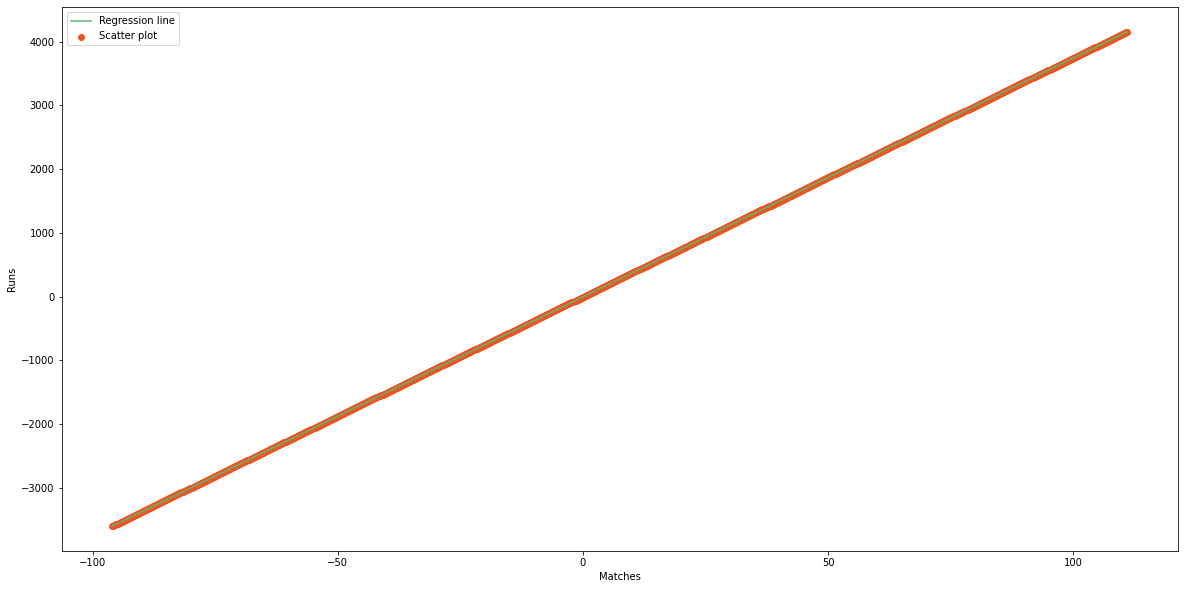

In [11]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x,1000)
y = b0 + b1 *x

plt.plot(x,y, color='#58b970', label='Regression line')
plt.scatter(x,y, c='#ef5423', label='Scatter plot')

plt.xlabel('Matches')
plt.ylabel('Runs')
plt.legend()
plt.show()



(12.5, -0.5)

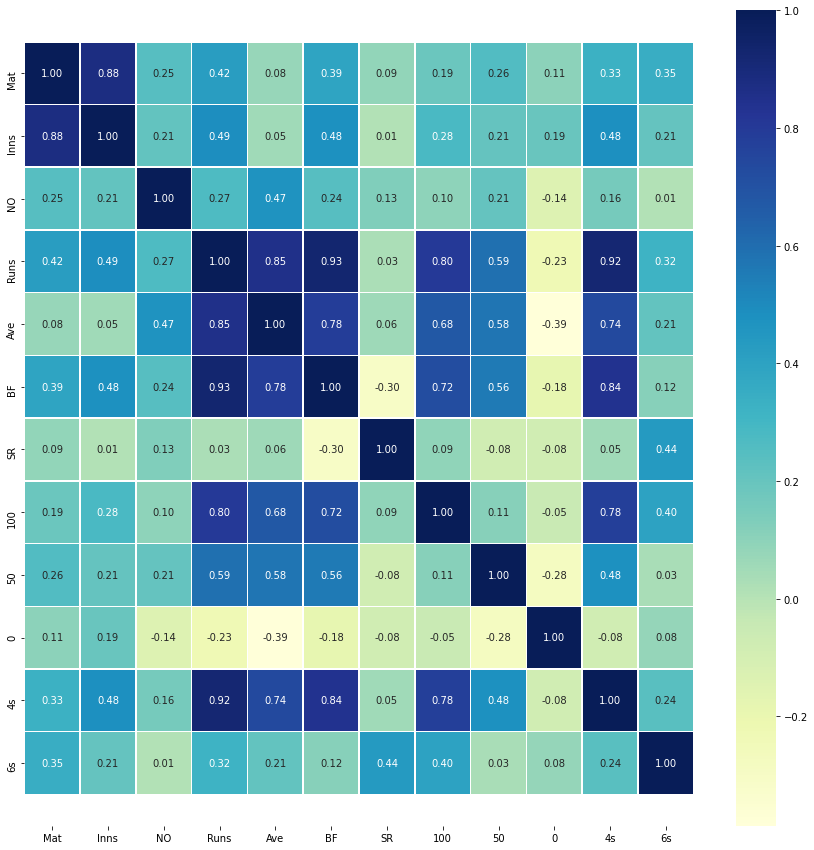

In [18]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

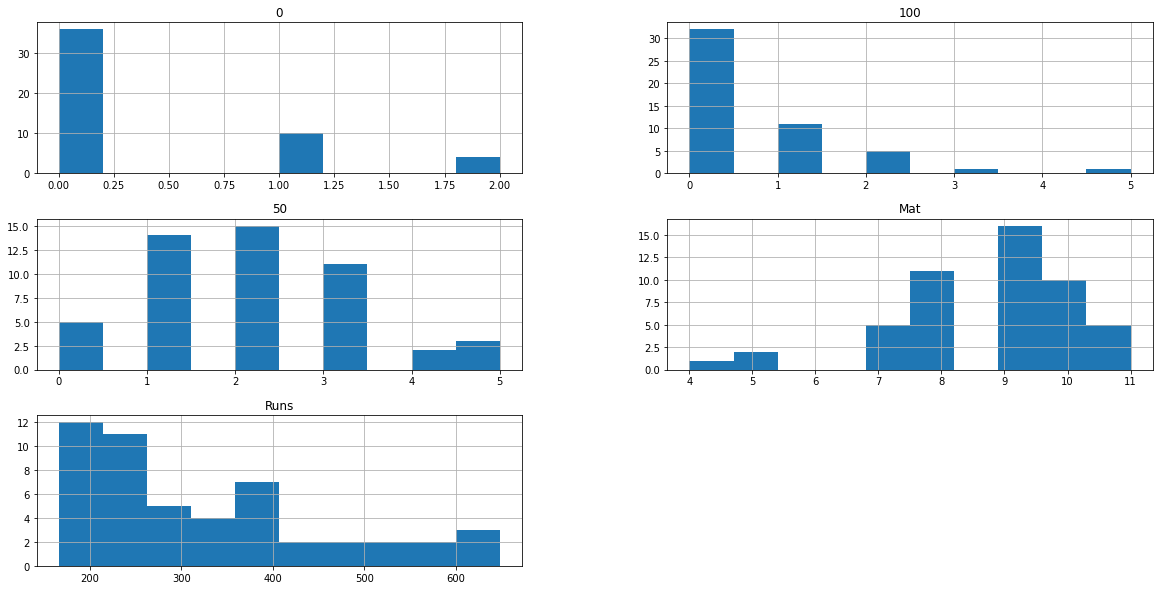

In [48]:
df= pd.DataFrame(data, columns = ['Mat', 'Runs',  
                                    '100', '50', 
                                    '0'] ) 
df.hist()
plt.show() 


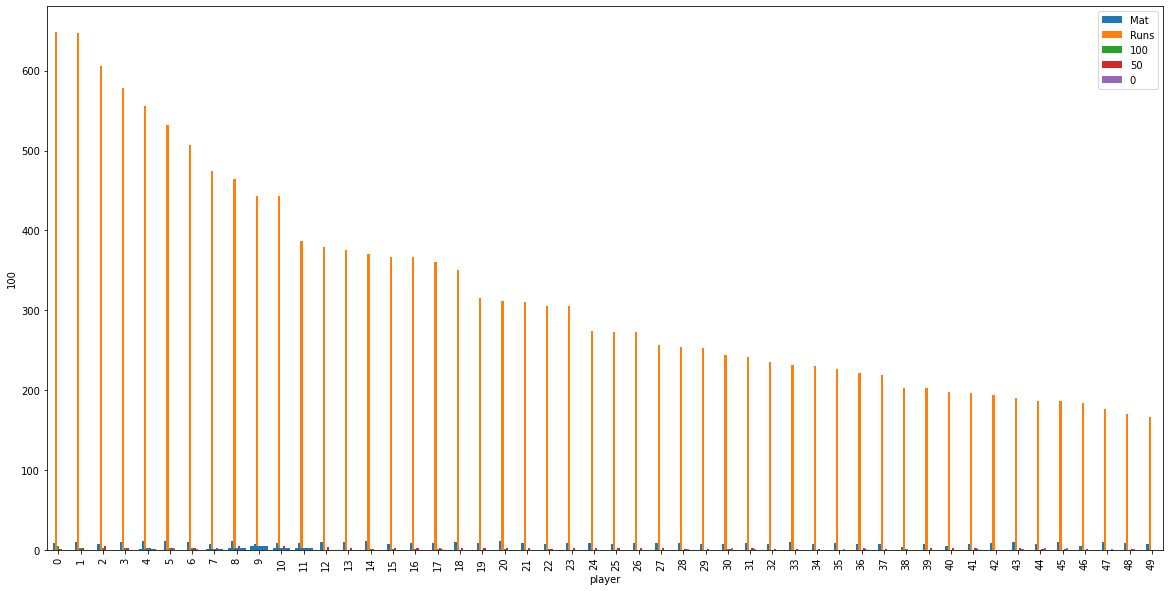

In [49]:
df.plot.bar() 
  
# plot between 2 attributes 
plt.bar(df['Mat'], df['100']) 
plt.xlabel("player") 
plt.ylabel("100") 
plt.show() 

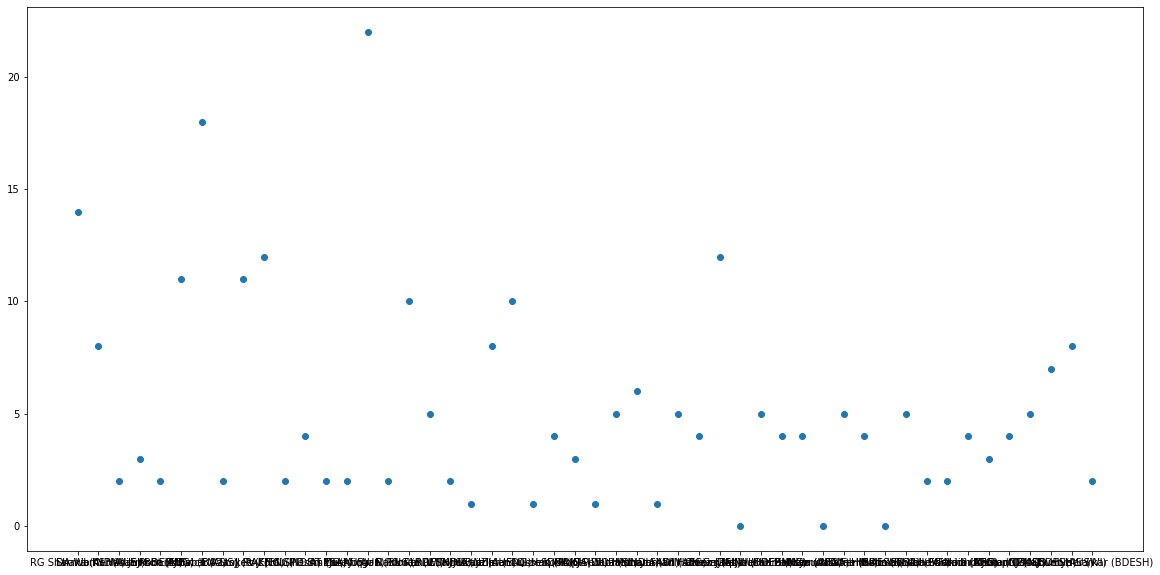

In [57]:
plt.scatter(data['Player'], data['6s']) 
plt.show() 